In [1]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt  
import random              
import pandas as pd
from sklearn.cluster import KMeans

In [2]:
#load the dataset
datafile=pd.ExcelFile(r'/content/drive/MyDrive/Asssignment4_Data.xlsx') 
Train=pd.read_excel(datafile,'Train') 
Test=pd.read_excel(datafile,'Test')

In [3]:
#Since excluding House ID i.e. first column, the next 8 columns are features, and last column in target,
X_train=Train.iloc[:,1:9] 
Y_train=Train.iloc[:,-1]
X_test=Test.iloc[:,1:9]
Y_test=Train.iloc[:,-1]

X_test_np=X_test.values

In [35]:
#Scaling the data before applying KNN
from sklearn.preprocessing import StandardScaler
X_np = StandardScaler().fit_transform(X_train)
X_np_test = StandardScaler().fit_transform(X_test) 

In [36]:
#To get centroids after assigning datapoints to k clusters
def initialize_random_centroids(X,K):
  np.random.seed(0)
  centroids=[]
  for i in range(K):
    centroid = X[np.random.choice(range(20),replace=False)]
    centroids.append(centroid)
  return np.array(centroids)

#Elucidian distance calculator
def cal_distance(x,centroids ):
    closest_centroid = np.argmin(np.sqrt(np.sum((x - centroids) ** 2, axis=1)))  
    return closest_centroid


#To update centroids
def updateCentroids(x):
    s=np.zeros(8)
    for i in x:
        s+=i
    val=s/len(x)
    return  val

In [42]:
#Setting k =3. As there are 3 classes in target, it seems more logical to start with 3 
K=3
#Taking values from training 

#Initializing 
centroid=initialize_random_centroids(X_np,K)

#Printing initial centroids 
print(centroid)

[[ 0.30996242  0.59743799  0.33115521 -0.16844998 -0.30323922 -0.5
  -0.32616404 -1.58035254]
 [-0.47836113 -0.4888129  -0.5046861   0.11703097 -0.30323922 -0.5
  -0.32616404 -0.57572745]
 [-0.38200271 -0.4888129   1.28732888  0.03430638 -1.8194353  -0.5
  -0.32616404 -0.42116975]]


In [43]:
#Creating loop to update centroids
cluster=[]
cluserpoints=[]
for i in range(K):
  cluster.append([])
  cluserpoints.append([])
for i in range(100):
  for j in range(K):
    cluster[j]=[]
    cluserpoints[j]=[]
  for j in range(20):
    cluster[cal_distance(X_np[j],centroid)].append(X_np[j])
    cluserpoints[cal_distance(X_np[j],centroid)].append(j)
  for j in range(K):
    centroid[j]=updateCentroids(cluster[j])


#Printing updated centroids
print(centroid)

[[ 2.73983851  2.76993978  1.9912119   2.80639134  1.21295687  2.41666667
   2.28314826 -0.73028516]
 [-0.33504227 -0.34397945 -0.45921578 -0.3675297   0.10107974 -0.22222222
  -0.23918696  0.25888416]
 [-0.15134767 -0.12672927  0.96860432 -0.03327908 -1.31403661 -0.5
  -0.32616404 -0.80756401]]


In [44]:
#Creating new 'Class' column as target column by setting Apartment=0, Condo=1, House=2
Train['Class']=Train['Construction type'].map({'Apartment':0,'Condo':1,'House':2}) 
Test['Class']=Test['Construction type'].map({'Apartment':0,'Condo':1,'House':2})

In [45]:
#Predictions for test data and accuracy
X_axis=[]
Y_axis=[]
for k in range(1,6):
  match=0.0
  accuracy=0.0
  for i in range (5):
    neighbor=[]
    majority=np.zeros(3)
    for j in range(20):
      neighbor.append((np.sqrt(np.sum((X_test_np[i] - X_np[j]) ** 2)),j))
    neighbor=sorted(neighbor)
    k_nearest=neighbor[:k]
    for l in k_nearest:
      majority[Train.iloc[l[1],10]]+=1
    if np.argmax(majority)==Test.iloc[i,10]:
      match+=1
  accuracy=match/5
  Y_axis.append(accuracy)
  X_axis.append(k)
  print(accuracy)

0.2
0.0
0.6
0.0
0.0


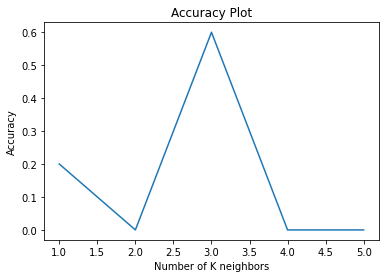

In [46]:
#Plotting accuracy 
plt.plot(X_axis, Y_axis)
plt.ylabel('Accuracy')
plt.xlabel('Number of K neighbors')
plt.title('Accuracy Plot')
plt.show()

According to the above plot, the accuracy was highest 60% when k was 3 for different numbers of neighbors ranging 1 to 5. So, optimal number of k is 3 when we scale the data. Without scaling, a flat line was observed with accuracy = 40%. Thus, scaling improves accuracy here. 
Finally, optimal number of k is 3. 
